In [43]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Must
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [44]:
# Load the data.
data_raw = pd.read_csv('train.csv')
data_val = pd.read_csv('test.csv')
data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]

# Preview the data
print(data1.info())
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Clean

In [45]:
# Check for null values
def missing_percentage(df):
    
    """A function for returning missing ratios."""
    
    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
               100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                     100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Checking 'NaN' values.

missing = missing_percentage(data1)
display(missing.T.style.background_gradient(cmap='Reds', axis=1))

print('Train columns with null values:\n', data1.isnull().sum())
print('-'*10)
print('Test columns with null values: \n', data_val.isnull().sum())
print('-'*10)

data1.describe(include='all')

,CryoSleep,ShoppingMall,VIP,HomePlanet,Name,Cabin,VRDeck,FoodCourt,Spa,Destination,RoomService,Age
Total,217.000000,208.000000,203.000000,201.000000,200.000000,199.000000,188.000000,183.000000,183.000000,182.000000,181.000000,179.000000
Percent,2.496261,2.392730,2.335212,2.312205,2.300702,2.289198,2.162660,2.105142,2.105142,2.093639,2.082135,2.059128


Train columns with null values:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
----------
Test columns with null values: 
 PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
----------


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


## Completing

In [46]:
for dataset in data_cleaner:
    # Complete CryoSleep with Mode
    dataset['CryoSleep'].fillna(dataset['CryoSleep'].mode()[0], inplace=True)
    # Complete ShoppingMall with Median
    dataset['ShoppingMall'].fillna(dataset['ShoppingMall'].median(), inplace=True)
    # Complete VIP with mode
    dataset['VIP'].fillna(dataset['VIP'].mode()[0], inplace=True)
    # Complete HomePlanet with Median
    dataset['HomePlanet'].fillna(dataset['HomePlanet'].mode()[0], inplace=True)
    # Complete VRDeck with Median
    dataset['VRDeck'].fillna(dataset['VRDeck'].median(), inplace=True)
    # Complete FoodCourt with Median
    dataset['FoodCourt'].fillna(dataset['FoodCourt'].median(), inplace=True)
    # Complete Spa with Median
    dataset['Spa'].fillna(dataset['Spa'].median(), inplace=True)
    # Complete Destination with Mode
    dataset['Destination'].fillna(dataset['Destination'].mode()[0], inplace=True)
    # Complete RoomService with Median
    dataset['RoomService'].fillna(dataset['RoomService'].median(), inplace=True)
    # Complete Age with Mean
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    
    # Drop rows with null value in Cabin and Name
    dataset.dropna(inplace=True)

# Drop PassengerId, and Name in data1
drop_column = ['PassengerId', 'Name']
data1.drop(drop_column,axis=1,inplace=True)


print('Train columns with null values:\n', data1.isnull().sum())
print('-'*10)
print('Test columns with null values: \n', data_val.isnull().sum())
print('-'*10)   

Train columns with null values:
 HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64
----------
Test columns with null values: 
 PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64
----------


## Creating - Feature Engineering

In [47]:
for dataset in data_cleaner:
    # Discrete Variable    
    ## Split Cabin into deck,side
    dataset['Deck'] = dataset['Cabin'].apply(lambda x: x.split('/')[0].strip())
    dataset['Side'] = dataset['Cabin'].apply(lambda x: x.split('/')[2].strip())
    
    # Continuous variable - Create bin
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

# Check both datasets
data1.info()
data_val.info()
data1.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8296 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8296 non-null   object  
 1   CryoSleep     8296 non-null   bool    
 2   Cabin         8296 non-null   object  
 3   Destination   8296 non-null   object  
 4   Age           8296 non-null   float64 
 5   VIP           8296 non-null   bool    
 6   RoomService   8296 non-null   float64 
 7   FoodCourt     8296 non-null   float64 
 8   ShoppingMall  8296 non-null   float64 
 9   Spa           8296 non-null   float64 
 10  VRDeck        8296 non-null   float64 
 11  Transported   8296 non-null   bool    
 12  Deck          8296 non-null   object  
 13  Side          8296 non-null   object  
 14  AgeBin        8296 non-null   category
dtypes: bool(3), category(1), float64(6), object(5)
memory usage: 810.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,AgeBin
3667,Mars,True,F/743/S,TRAPPIST-1e,12.0,False,0.0,0.0,0.0,0.0,0.0,True,F,S,"(-0.079, 15.8]"
2206,Earth,False,F/481/P,TRAPPIST-1e,29.0,False,0.0,0.0,792.0,0.0,0.0,True,F,P,"(15.8, 31.6]"
1399,Earth,False,E/111/S,TRAPPIST-1e,21.0,False,894.0,1.0,0.0,61.0,26.0,False,E,S,"(15.8, 31.6]"
4282,Europa,True,B/180/S,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,True,B,S,"(15.8, 31.6]"
7678,Earth,False,G/1329/P,TRAPPIST-1e,19.0,False,0.0,0.0,0.0,0.0,0.0,False,G,P,"(15.8, 31.6]"
758,Earth,False,F/145/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,874.0,0.0,False,F,S,"(31.6, 47.4]"
1069,Earth,False,G/177/S,TRAPPIST-1e,55.0,False,412.0,97.0,3.0,0.0,0.0,False,G,S,"(47.4, 63.2]"
418,Europa,True,B/15/S,TRAPPIST-1e,42.0,False,0.0,0.0,0.0,0.0,0.0,True,B,S,"(31.6, 47.4]"
6620,Mars,True,F/1450/P,TRAPPIST-1e,54.0,False,0.0,0.0,0.0,0.0,0.0,True,F,P,"(47.4, 63.2]"
4710,Europa,False,B/167/P,TRAPPIST-1e,41.0,False,4.0,4619.0,0.0,251.0,213.0,True,B,P,"(31.6, 47.4]"


## Converting

In [48]:
# Code categorical data
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['HomePlanetCode'] = label.fit_transform(dataset['HomePlanet'])
    dataset['DestinationCode'] = label.fit_transform(dataset['Destination'])
    dataset['AgeBinCode'] = label.fit_transform(dataset['AgeBin'])
    dataset['DeckCode'] = label.fit_transform(dataset['Deck'])
    dataset['SideCode'] = label.fit_transform(dataset['Side'])
    

data1.Transported = data1.Transported.astype(int)
data1.CryoSleep = data1.CryoSleep.astype(int)
data1.VIP = data1.VIP.astype(int)

Target = ['Transported']
data1_x = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Side']
data1_x_cal = ['HomePlanetCode', 'DestinationCode', 'Age',
              'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'DeckCode', 'SideCode']
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')

data1_x_bin = ['HomePlanetCode', 'DestinationCode', 'AgeBinCode',
              'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'DeckCode', 'SideCode']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

data1_dummy.head()

Original X Y:  ['Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Side'] 

Bin X Y:  ['Transported', 'HomePlanetCode', 'DestinationCode', 'AgeBinCode', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'DeckCode', 'SideCode'] 

Dummy X Y:  ['Transported', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P', 'Side_S'] 



,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [49]:
# Check the data again
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data1.describe(include = 'all')

Train columns with null values: 
 HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported        0
Deck               0
Side               0
AgeBin             0
HomePlanetCode     0
DestinationCode    0
AgeBinCode         0
DeckCode           0
SideCode           0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8296 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   HomePlanet       8296 non-null   object  
 1   CryoSleep        8296 non-null   int32   
 2   Cabin            8296 non-null   object  
 3   Destination      8296 non-null   object  
 4   Age              8296 non-null   float64 
 5   VIP              8296 non-null   int32   
 6   RoomService      8296 non-null   f

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,AgeBin,HomePlanetCode,DestinationCode,AgeBinCode,DeckCode,SideCode
count,8296,8296.000000,8296,8296,8296.000000,8296.000000,8296.000000,8296.00000,8296.000000,8296.000000,8296.000000,8296.000000,8296,8296,8296,8296.000000,8296.000000,8296.000000,8296.000000,8296.000000
unique,3,NaN,6438,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2,5,NaN,NaN,NaN,NaN,NaN
top,Earth,NaN,G/734/S,TRAPPIST-1e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,S,"(15.8, 31.6]",NaN,NaN,NaN,NaN,NaN
freq,4591,NaN,8,5828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2721,4184,4061,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.348481,NaN,NaN,28.835270,0.022903,216.551591,448.22999,168.569431,300.515068,296.606678,0.503496,NaN,NaN,NaN,0.649229,1.496745,1.353905,4.303279,0.504339
std,NaN,0.476518,NaN,NaN,14.311698,0.149602,633.250407,1603.49489,550.200451,1113.942175,1109.163673,0.500018,NaN,NaN,NaN,0.795652,0.813384,0.891114,1.778885,0.500011
min,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,NaN,NaN,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,1.000000,3.000000,0.000000
50%,NaN,0.000000,NaN,NaN,27.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,2.000000,1.000000,5.000000,1.000000
75%,NaN,1.000000,NaN,NaN,37.000000,0.000000,41.000000,63.00000,23.000000,54.000000,40.000000,1.000000,NaN,NaN,NaN,1.000000,2.000000,2.000000,6.000000,1.000000


## Split the dataset

In [50]:
# Split the data1_cal dataset
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_cal], data1[Target], random_state = 0)

# Split the data1_bin dataset
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)

# Split the data1_dummy dataset
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)

print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x.head()

Data1 Shape: (8296, 20)
Train1 Shape: (6222, 10)
Test1 Shape: (2074, 10)


,HomePlanetCode,DestinationCode,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,DeckCode,SideCode
3962,2,0,24.0,469.0,0.0,0.0,196.0,0.0,4,1
2173,0,1,57.0,0.0,0.0,0.0,0.0,0.0,6,0
568,0,2,24.0,0.0,4.0,0.0,670.0,113.0,4,1
2809,1,0,30.0,728.0,2551.0,0.0,48.0,1804.0,1,0
1650,0,2,4.0,0.0,0.0,0.0,0.0,0.0,6,0


# EDA

In [51]:
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Transported Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean().sort_values(by='Transported', ascending=False))
        print('-'*10)

Transported Correlation by: HomePlanet
  HomePlanet  Transported
1     Europa     0.659585
2       Mars     0.522903
0      Earth     0.427576
----------
Transported Correlation by: CryoSleep
   CryoSleep  Transported
1          1     0.818402
0          0     0.335060
----------
Transported Correlation by: Destination
     Destination  Transported
0    55 Cancri e     0.612185
1  PSO J318.5-22     0.509855
2    TRAPPIST-1e     0.470830
----------
Transported Correlation by: VIP
   VIP  Transported
0    0     0.506415
1    1     0.378947
----------
Transported Correlation by: Deck
  Deck  Transported
1    B     0.733945
2    C     0.680764
6    G     0.514194
0    A     0.497992
5    F     0.439912
3    D     0.429487
4    E     0.360560
7    T     0.250000
----------
Transported Correlation by: Side
  Side  Transported
1    S     0.554732
0    P     0.451362
----------


Text(0.5, 1.0, 'Transported Rate by Side')

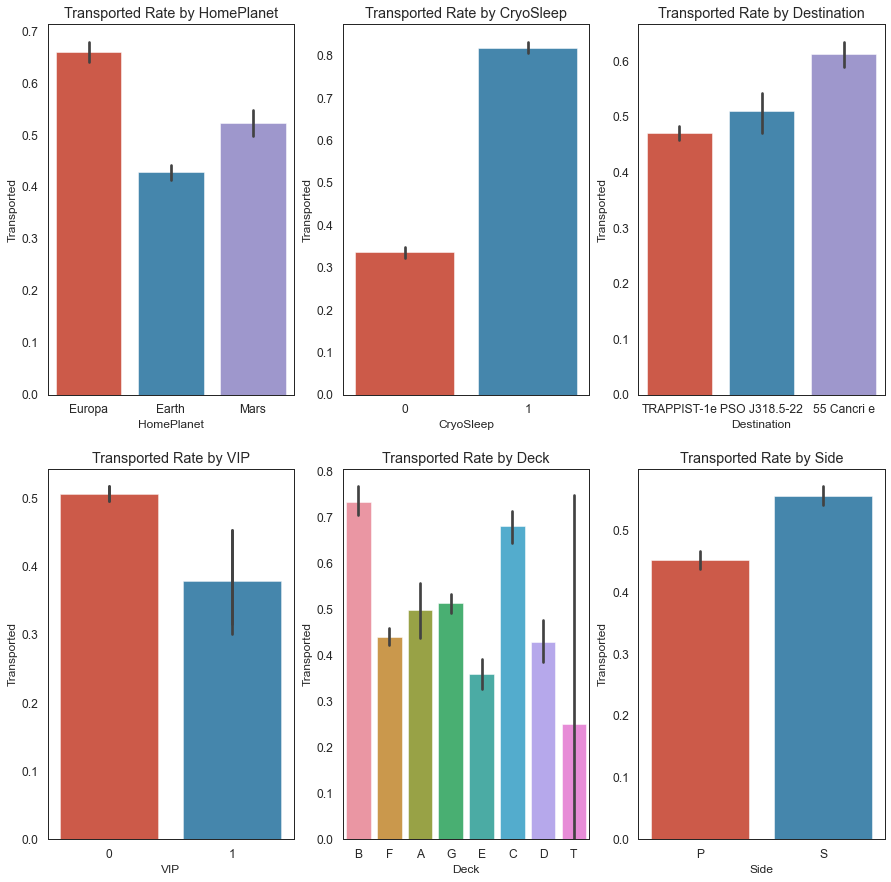

In [52]:
plt.figure(figsize=(15,15))

plt.subplot(231)
sns.barplot(x='HomePlanet', y='Transported', data=data1)
plt.title('Transported Rate by HomePlanet')

plt.subplot(232)
sns.barplot(x='CryoSleep', y='Transported', data=data1)
plt.title('Transported Rate by CryoSleep')

plt.subplot(233)
sns.barplot(x='Destination', y='Transported', data=data1)
plt.title('Transported Rate by Destination')

plt.subplot(234)
sns.barplot(x='VIP', y='Transported', data=data1)
plt.title('Transported Rate by VIP')

plt.subplot(234)
sns.barplot(x='VIP', y='Transported', data=data1)
plt.title('Transported Rate by VIP')

plt.subplot(235)
sns.barplot(x='Deck', y='Transported', data=data1)
plt.title('Transported Rate by Deck')

plt.subplot(236)
sns.barplot(x='Side', y='Transported', data=data1)
plt.title('Transported Rate by Side')

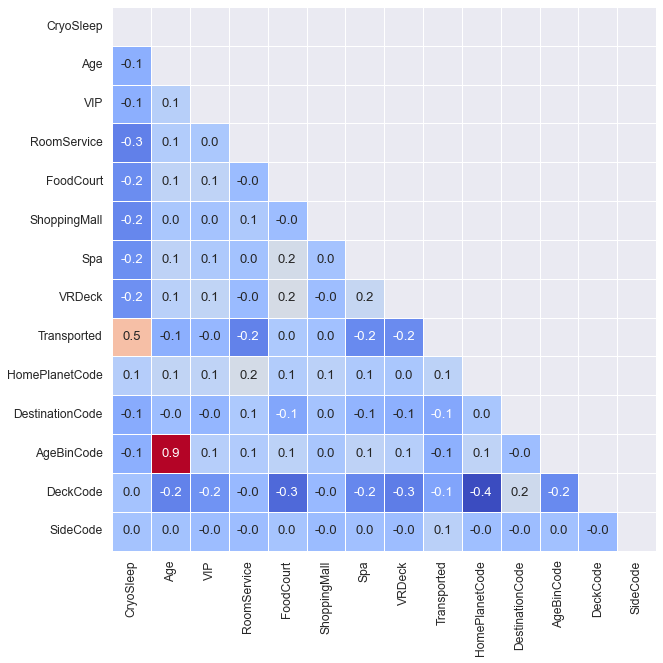

In [61]:
# Correlation heatmap
sns.set(font_scale=1.1)
correlation_train = data1.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(10,10))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

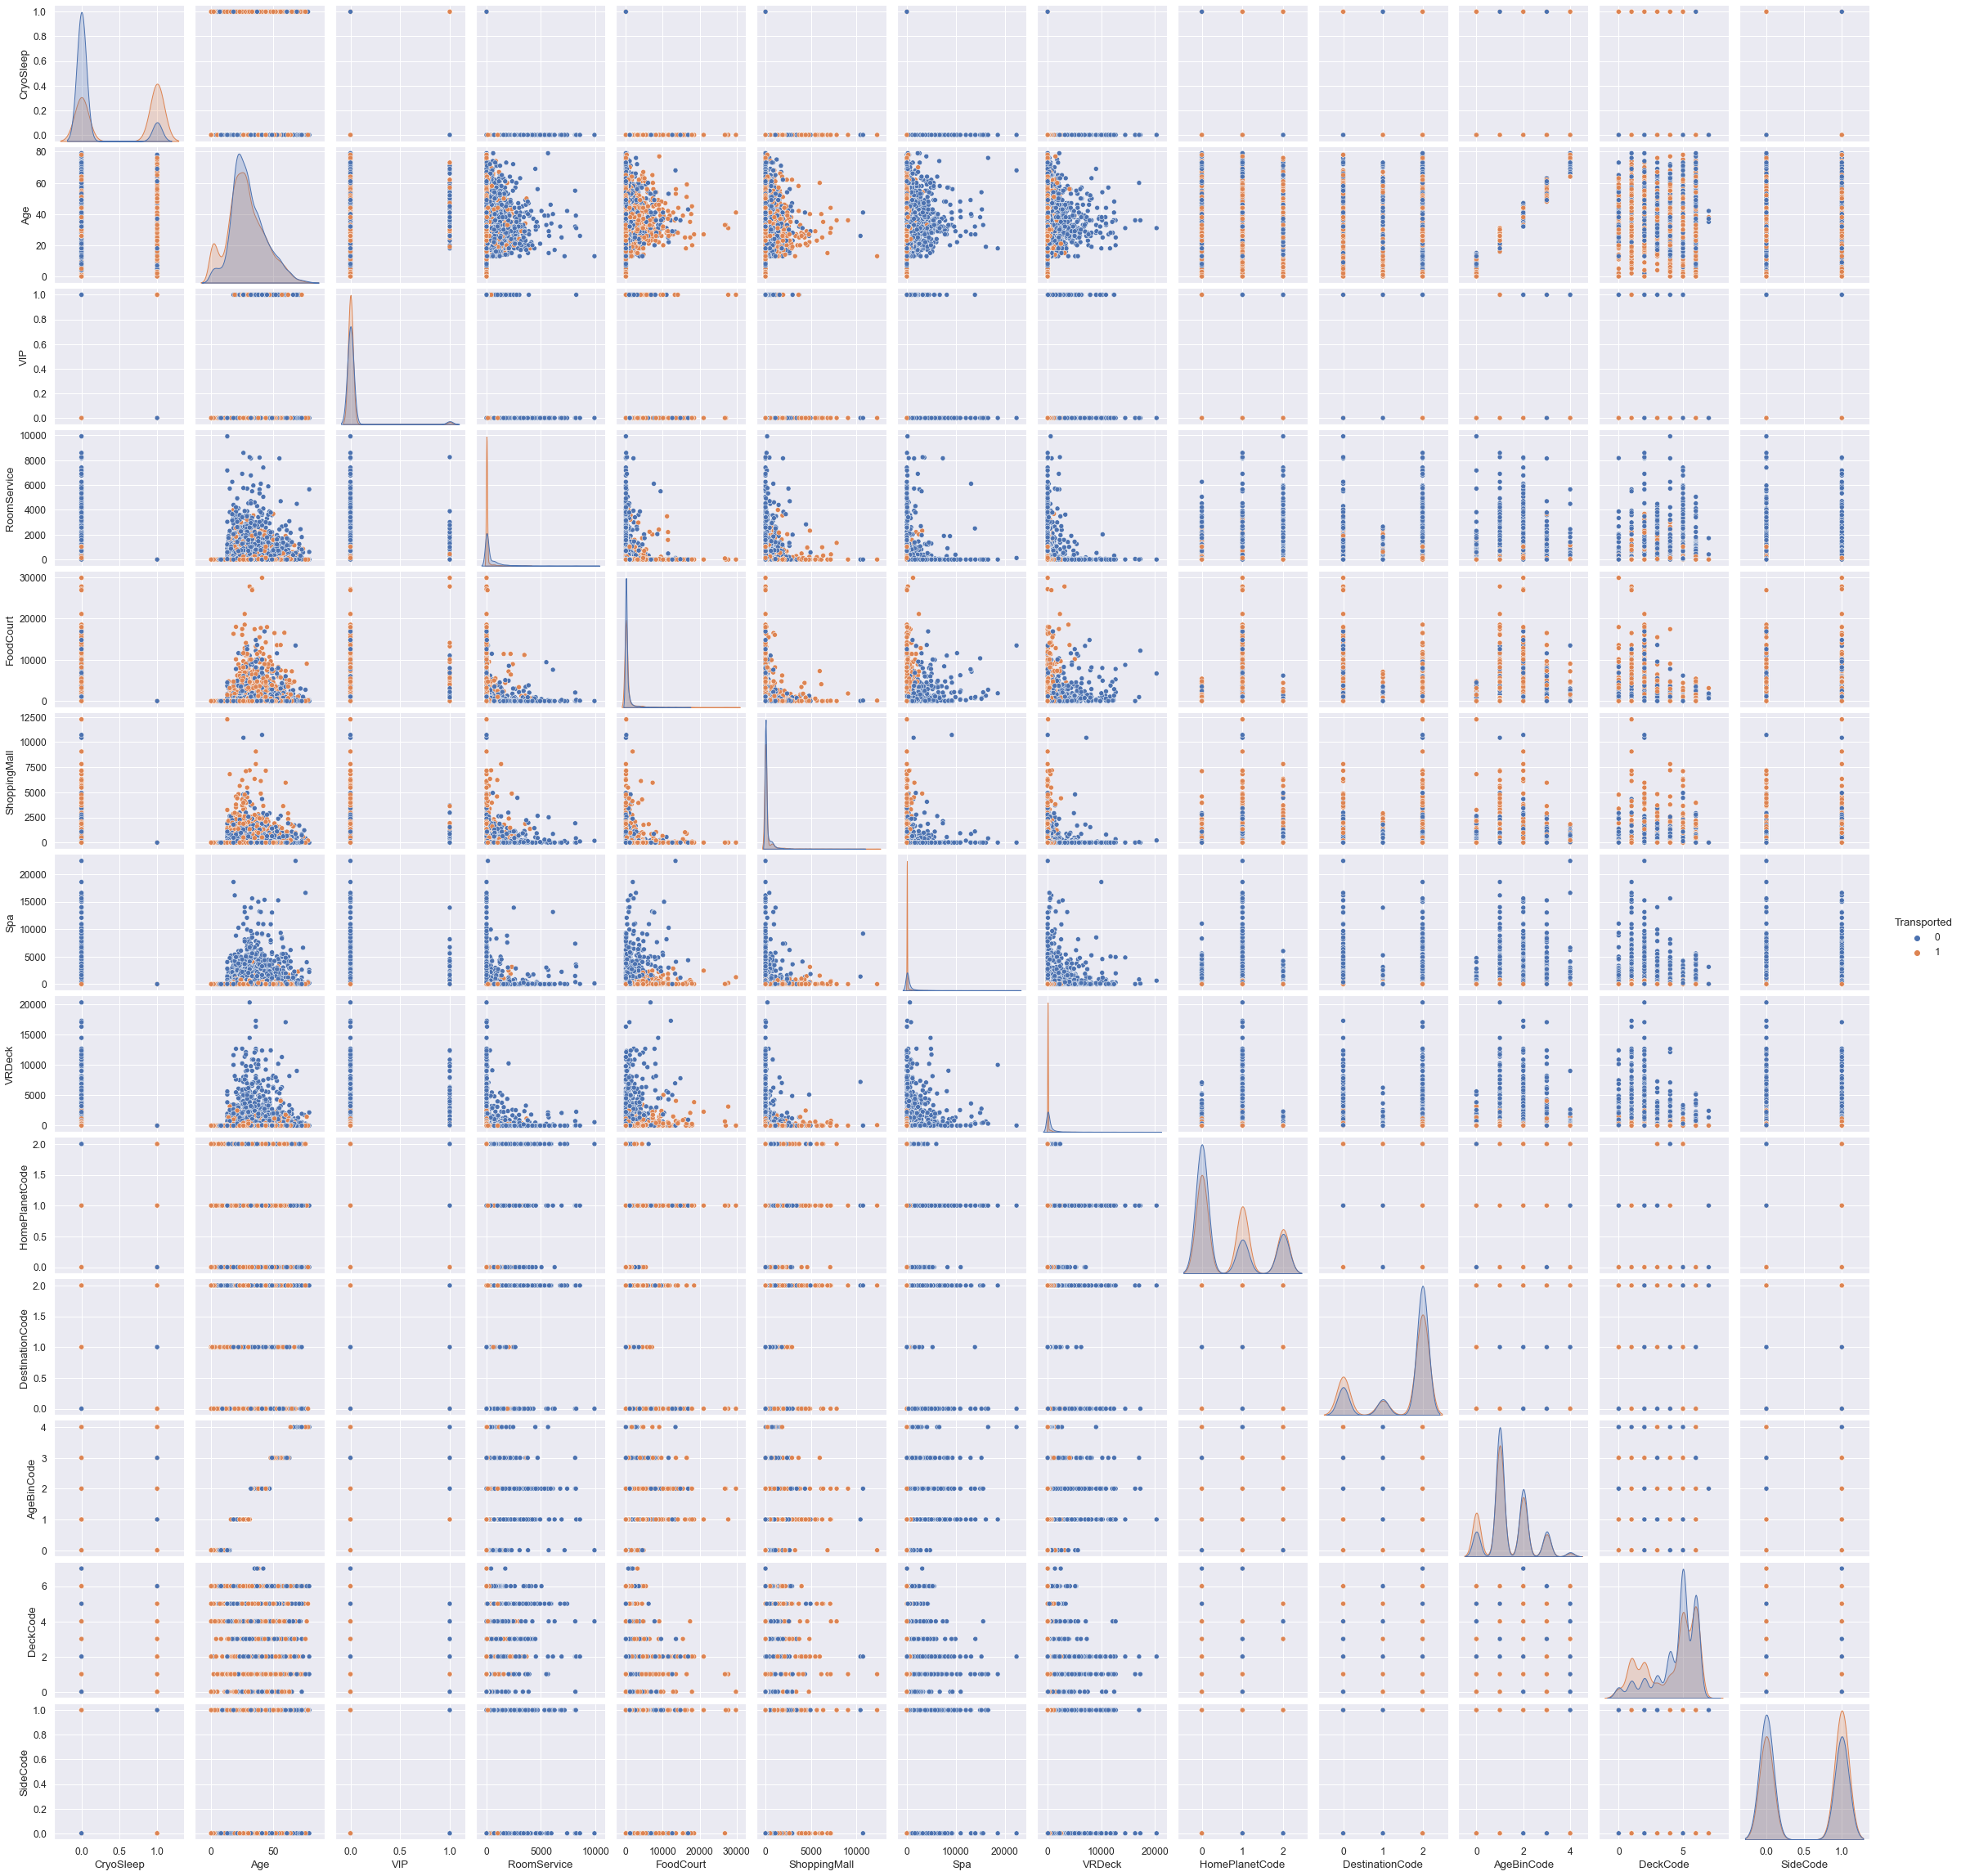

In [63]:
sns.pairplot(data=data1, hue='Transported')